### Resumen del conjunto de datos  KAGGLE
El Animal Image Classification Dataset es una colección completa de imágenes diseñadas para el desarrollo y evaluación de modelos de aprendizaje automático en el campo de la visión por computadora. Contiene 3.000 imágenes JPG, cuidadosamente segmentadas en tres clases que representan mascotas comunes y vida silvestre: gatos, perros y serpientes.

### Contenido del Conjunto de Datos
gatos/: Un conjunto de 1,000 imágenes JPG de gatos, que muestran una amplia gama de razas, entornos y posturas.

perros/: Una compilación diversa de 1.000 imágenes de perros, capturando una multitud de razas en diversas actividades y entornos.

serpientes/: Una variedad de 1,000 imágenes de serpientes, que representan numerosas especies en hábitats naturales y controlados. Detalles de la imagen:

Resolución: Cada imagen mantiene una resolución uniforme de 256x256 píxeles, proporcionando claridad y consistencia para el entrenamiento del modelo.

Formato de archivo: JPG Color Space: RGB

In [6]:
# Definir las rutas de las carpetas
base_dir = 'imagenes\\animales'
batch_size = 32
img_height, img_width = 256, 256

In [1]:
# CARGA DE DATOS
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definir las rutas de las carpetas
base_dir = 'imagenes\\animales'
batch_size = 32
img_height, img_width = 256, 256

# Crear generadores de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalización de imágenes
    validation_split=0.2  # Utilizar el 20% de los datos para validación
)

test_datagen = ImageDataGenerator(
    rescale=1./255  # Normalización de imágenes
)

# Cargar datos de entrenamiento y validación
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Usar el subconjunto de entrenamiento
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Usar el subconjunto de validación
)

# Cargar datos de prueba (si se requiere un conjunto de prueba separado, de lo contrario se usará el conjunto de validación)
test_generator = test_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


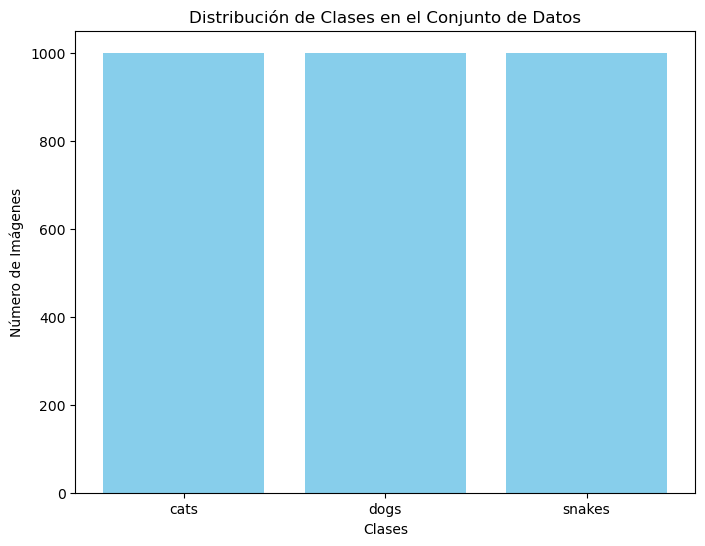

In [2]:
import os
import matplotlib.pyplot as plt

# Contar el número de imágenes en cada clase
class_counts = {class_name: len(os.listdir(os.path.join(base_dir, class_name))) for class_name in ['cats', 'dogs', 'snakes']}

# Crear el histograma
plt.figure(figsize=(8, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel('Clases')
plt.ylabel('Número de Imágenes')
plt.title('Distribución de Clases en el Conjunto de Datos')
plt.show()

In [3]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),
    layers.Conv2D(128, (3, 3), activation='relu'), 
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(3, activation='softmax')  # Tres clases: gatos, perros, serpientes
])

model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    14,746,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,843,491 (56.62 MB)

 Trainable params: 14,843,491 (56.62 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
#COSTRUCCION DEL MODELO
from tensorflow.keras import layers, models

In [5]:
#COMPILACIÓN DEL MODELO
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
# ENTRENAMIENTO DEL MODELO 
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10


C:\Users\deyvi.caicedo\AppData\Local\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 289s 4s/step - accuracy: 0.3818 - loss: 1.4345 - val_accuracy: 0.5133 - val_loss: 0.9580
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 302s 4s/step - accuracy: 0.5918 - loss: 0.8727 - val_accuracy: 0.6400 - val_loss: 0.7854
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 274s 4s/step - accuracy: 0.6706 - loss: 0.7487 - val_accuracy: 0.6417 - val_loss: 0.7447
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 273s 4s/step - accuracy: 0.7555 - loss: 0.5722 - val_accuracy: 0.6633 - val_loss: 0.7735
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 284s 4s/step - accuracy: 0.8587 - loss: 0.3662 - val_accuracy: 0.6800 - val_loss: 0.9066
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 276s 4s/step - accuracy: 0.9103 - loss: 0.2395 - val_accuracy: 0.6717 - val_loss: 1.1884
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 295s 4s/step - accuracy: 0.9533 - loss: 0.1222 - val_accuracy: 0.6583 - val_loss: 1.3638
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 299s 4s/step - accuracy: 0.9813 - loss: 0.0750 - val_accuracy: 0.6633 - val_loss: 1.

In [7]:
# EVALUACIÓN DEL MODELO 
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 60s 640ms/step - accuracy: 0.9387 - loss: 0.4594
Test Loss: 0.5167, Test Accuracy: 0.9337


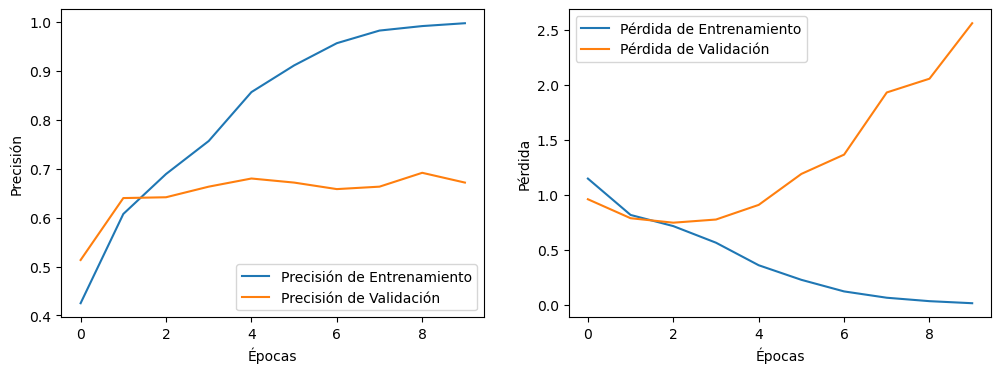

In [8]:
# VISUALIZACIÓN DE RESULTADOS
# Graficar precisión y pérdida
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

94/94 ━━━━━━━━━━━━━━━━━━━━ 60s 637ms/step


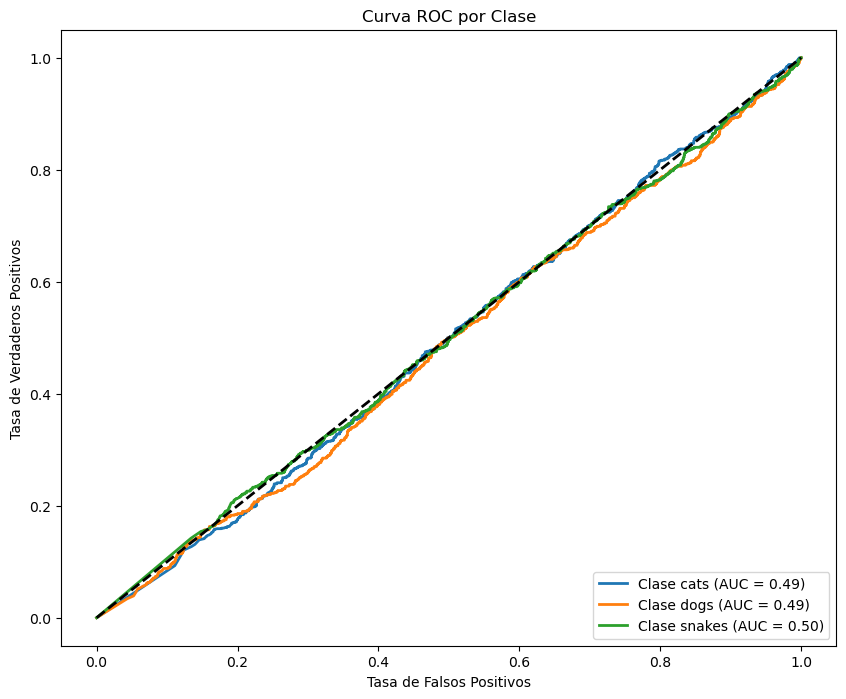

In [10]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


# Obtener nombres de las clases
class_names = list(train_generator.class_indices.keys())

# Obtener predicciones
y_pred_proba = model.predict(test_generator)
y_true = test_generator.classes

# Convertir las etiquetas verdaderas a formato binario
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])  # Cambiar según el número de clases

# Calcular la curva ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar la curva ROC
plt.figure(figsize=(10, 8))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Clase {class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC por Clase')
plt.legend(loc='lower right')
plt.show()


In [11]:
from sklearn.metrics import f1_score

# Calcular las etiquetas predichas y verdaderas
y_pred_classes = np.argmax(y_pred_proba, axis=1)

# Calcular el F1 Score
f1 = f1_score(y_true, y_pred_classes, average='weighted')
print(f"F1 Score (ponderado): {f1:.4f}")


F1 Score (ponderado): 0.3222


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step


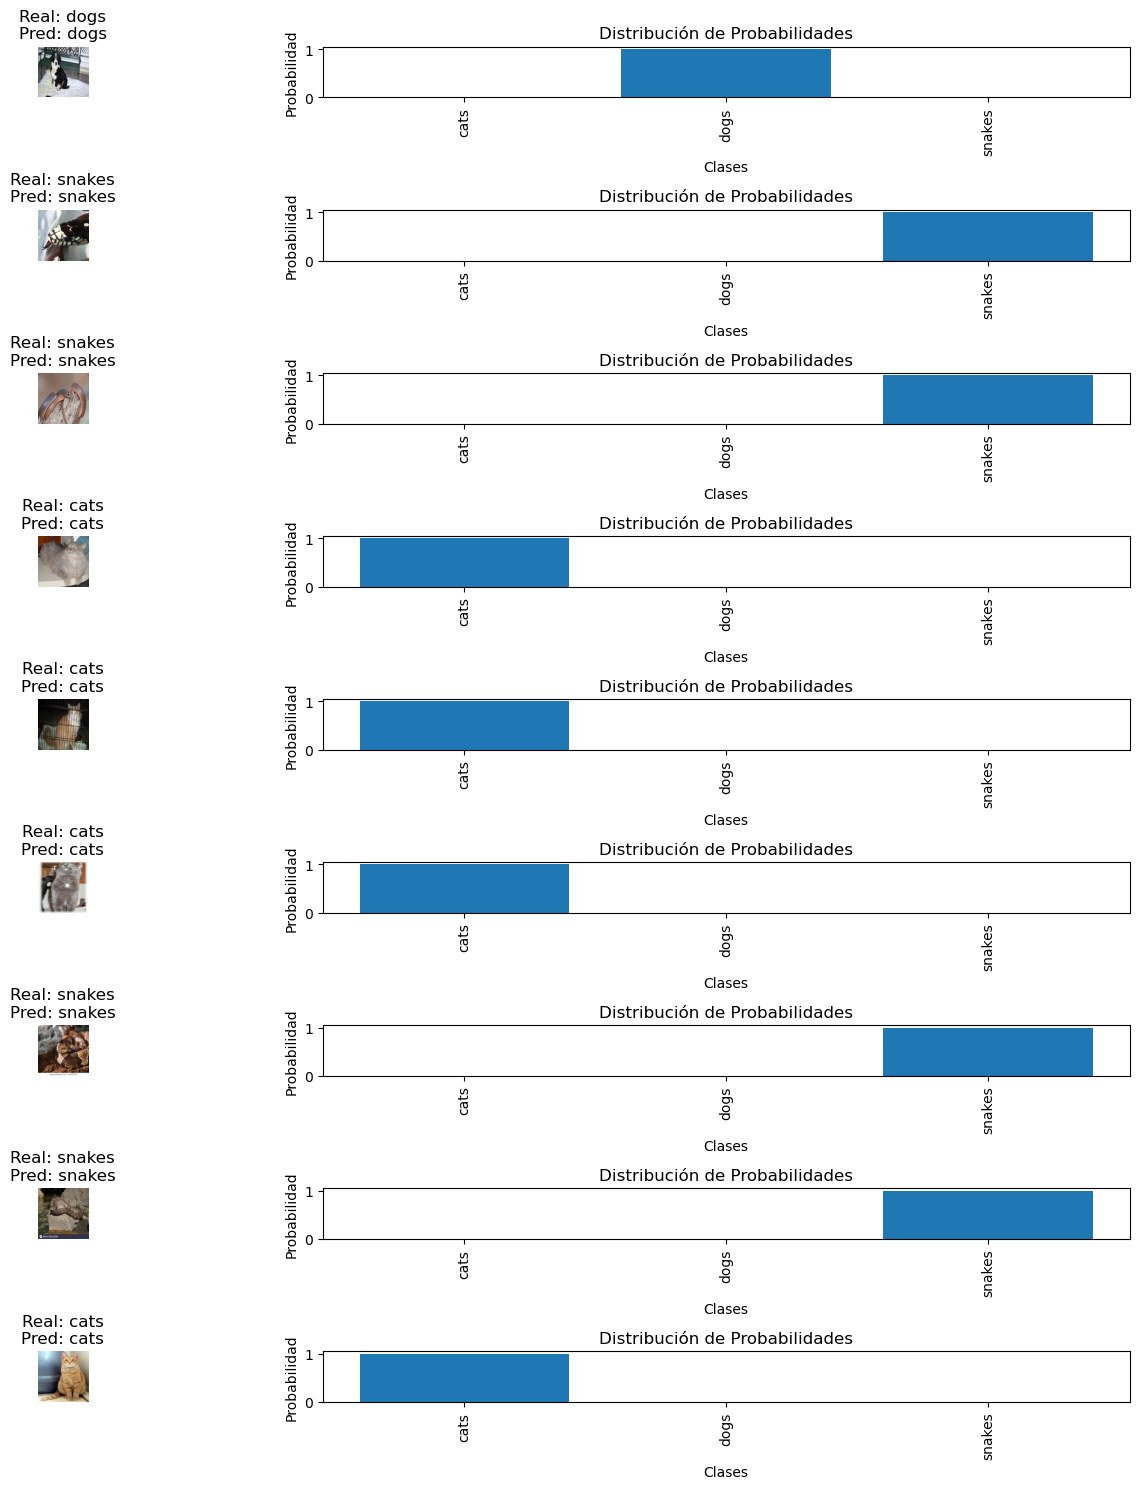

In [12]:
# Mostrar ejemplos de imágenes de prueba con etiquetas reales y predicciones
def plot_predictions(generator, model, class_names):
    images, labels = next(generator)
    predictions = model.predict(images)

    plt.figure(figsize=(15, 15))
    for i in range(9):
        plt.subplot(9, 2, 2*i + 1)
        plt.imshow(images[i])
        real_label = class_names[np.argmax(labels[i])]
        pred_label = class_names[np.argmax(predictions[i])]
        plt.title(f"Real: {real_label}\nPred: {pred_label}")
        plt.axis('off')
        
        # Histograma de las probabilidades
        plt.subplot(9, 2, 2*i + 2)
        plt.bar(range(len(class_names)), predictions[i])
        plt.xticks(ticks=range(len(class_names)), labels=class_names, rotation=90)
        plt.xlabel('Clases')
        plt.ylabel('Probabilidad')
        plt.title('Distribución de Probabilidades')
        
    plt.tight_layout()
    plt.show()

# Obtener nombres de las clases
class_names = list(train_generator.class_indices.keys())

# Mostrar predicciones
plot_predictions(test_generator, model, class_names)



94/94 ━━━━━━━━━━━━━━━━━━━━ 59s 628ms/step


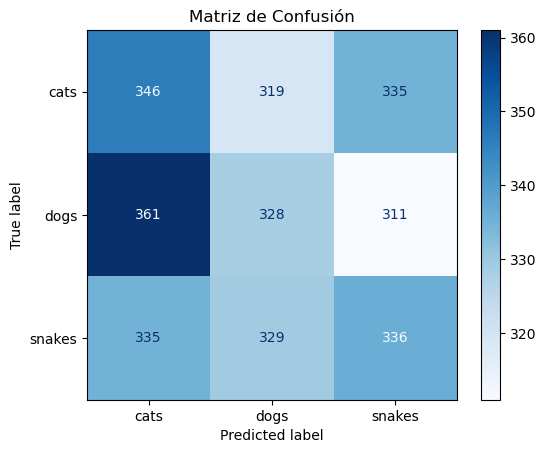

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Obtener predicciones
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()